# Predicting Smokers and Drinkers Using Body Signal Data

By: Mani Teja Gunda

ID: RQ47971

Data Source: https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

### Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

### Reading the csv file

In [2]:
df = pd.read_csv("smoking_driking_dataset_Ver01.csv")

### About the dataframe

In [3]:
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")

The data has 991346 rows and 24 columns


In [4]:
# the first 10 rows
df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
5,Male,50,165,55,75.0,1.2,1.5,1.0,1.0,142.0,...,95.0,232.0,13.8,3.0,0.8,29.0,40.0,37.0,3.0,Y
6,Female,45,150,55,69.0,0.5,0.4,1.0,1.0,101.0,...,115.0,75.0,12.3,1.0,0.8,19.0,12.0,12.0,1.0,N
7,Male,35,175,65,84.2,1.2,1.0,1.0,1.0,132.0,...,107.0,101.0,14.4,1.0,0.8,18.0,18.0,35.0,3.0,Y
8,Male,55,170,75,84.0,1.2,0.9,1.0,1.0,145.0,...,141.0,100.0,15.1,1.0,0.8,32.0,23.0,26.0,1.0,Y
9,Male,40,175,75,82.0,1.5,1.5,1.0,1.0,132.0,...,118.0,83.0,13.9,1.0,0.9,21.0,38.0,16.0,2.0,Y


In [5]:
# all the columns
df.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [6]:
# datatypes
df.dtypes

sex                  object
age                   int64
height                int64
weight                int64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

As the smoking state column is a flag indicating the smoking status of a person, converting it from float to object

### Data Cleaning

In [7]:
# checking for duplicate rows
print("number of duplicated rows:", df.duplicated().sum())

number of duplicated rows: 26


In [8]:
# checking for null values
df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

There are no null values in any of the columns. So, we are going to drop the duplicate rows

In [9]:
# dropping the duplicate rows
print("Number of rows before dropping duplicates are", len(df.index))
df = df.drop_duplicates()
print("Number of rows after dropping duplicates are", len(df.index))

Number of rows before dropping duplicates are 991346
Number of rows after dropping duplicates are 991320


In [10]:
# transforming the sex column
df['sex'] = df['sex'].replace('Male',1)
df['sex'] = df['sex'].replace('Female',0)

## Exploring the data

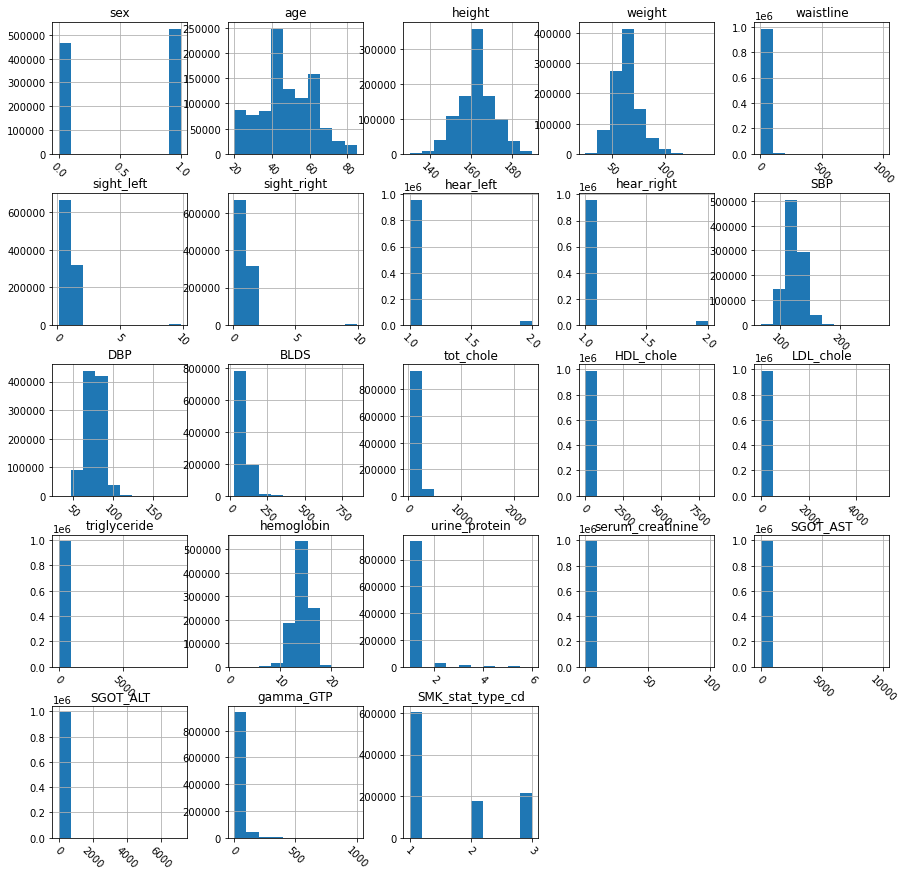

In [11]:
df.hist(figsize=(15,15), xrot=-45, bins=10)
plt.show()

Smoking states are as follows: 1(never smoked), 2(used to smoke but quit), 3(still smoking).

In [12]:
# changing the smoking state to more understandable way
# 1(never smoked) to N
# 2(used to smoke but quit) to Q
# 3(still smoking) to Y
#df['SMK_stat_type_cd'] = np.where(df['SMK_stat_type_cd'] == '1.0', "N", np.where(df['SMK_stat_type_cd'] == '2.0', "Q", np.where(df['SMK_stat_type_cd'] == '3.0', "Y", "U")))

df['DRK_YN'] = np.where(df['DRK_YN'] == 'Y', "2", "1")
df['DRK_YN'] = df['DRK_YN'].astype(int)

Text(0.5, 1.0, 'Drinking State')

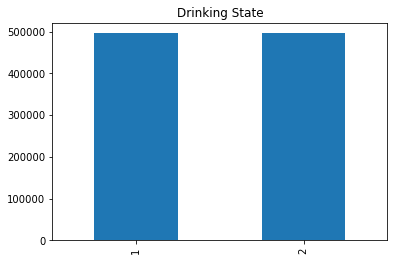

In [13]:
df['DRK_YN'].value_counts().plot(kind="bar")
plt.title("Drinking State")

Text(0.5, 1.0, 'Smoking State')

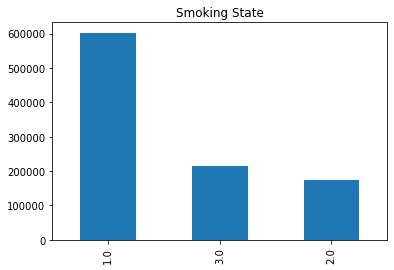

In [14]:
df['SMK_stat_type_cd'].value_counts().plot(kind="bar")
plt.title("Smoking State")

The data does not require merging, splitting or melting. The data augmentation is not required as there is already enough data for both the labels. After the model training if it the validation accuracy is not good, augmentation will be considered

#### Do all drinkers smoke or Do all smokers drink?

Text(0.5, 0, 'Drinking State')

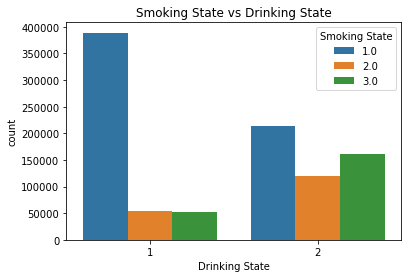

In [15]:
sns.countplot(x="DRK_YN", hue="SMK_stat_type_cd", data=df)
plt.title("Smoking State vs Drinking State")
plt.legend(title = "Smoking State")
plt.xlabel("Drinking State")

From the above plot, we can see that:
1. Majority of the non-drinkers are non-smokers
2. While majority of drinkers are non smokers, the gap between each of the smoking state is less
3. The number of drinkers who smoke are approximately three times the number of non-drinkers who smoke

#### Is it true that the majority of drinkers/smokers are men? What percent of smokers or drinkers are women?

Text(0.5, 0, 'Drinking State')

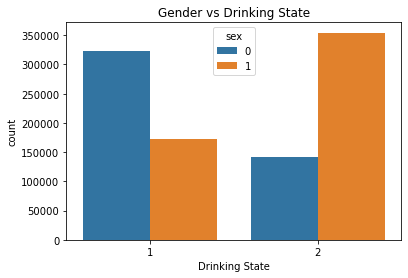

In [16]:
sns.countplot(x="DRK_YN", hue="sex", data=df)
plt.title("Gender vs Drinking State")
plt.xlabel("Drinking State")

From the above plot, we can see that:
1. Approximately 70% of the drinkers are male
2. Non-drinking female is almost twice the number of non-drinking male 

Text(0.5, 0, 'Smoking State')

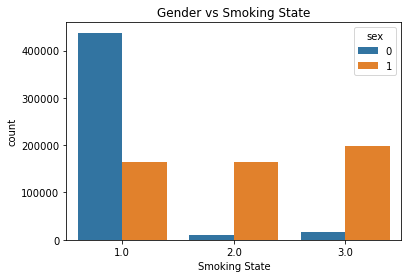

In [17]:
sns.countplot(x="SMK_stat_type_cd", hue="sex", data=df)
plt.title("Gender vs Smoking State")
plt.xlabel("Smoking State")

From the above plot, we can see that:

1. Majority of the non-smokers are female
2. Male population dominates in both the states of still smoking and quit smoking

#### What age groups do the majority of smokers/drinkers belong to?

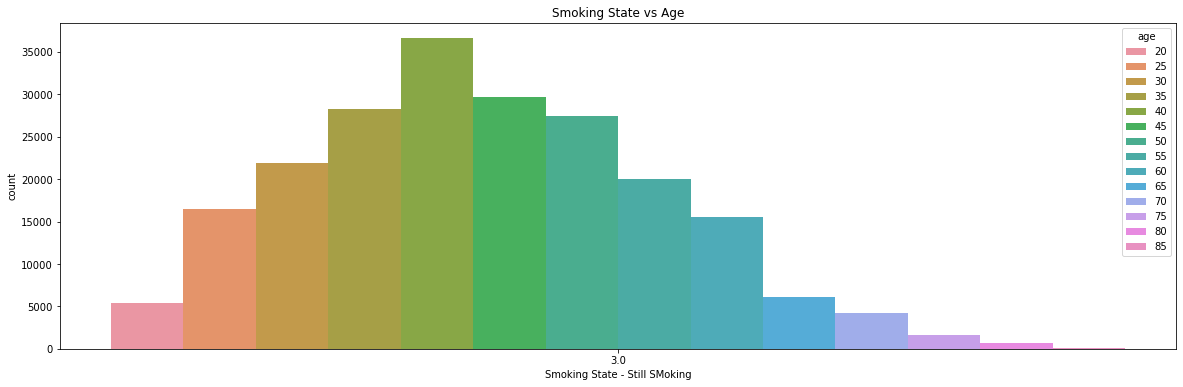

In [18]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df[df["SMK_stat_type_cd"]==3.0]['SMK_stat_type_cd'], hue="age", data=df)
plt.title("Smoking State vs Age")
plt.xlabel("Smoking State - Still SMoking")
plt.show()

Most of the smokers are between 35 and 50 years

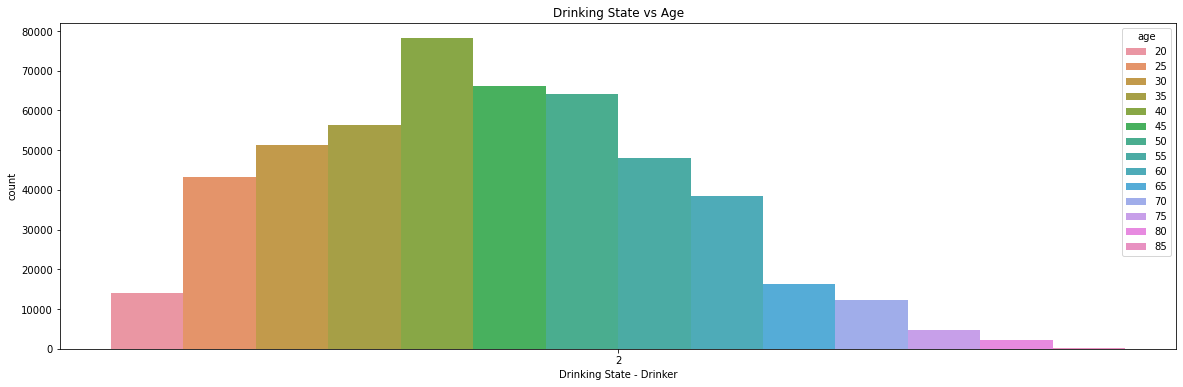

In [19]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df[df["DRK_YN"]==2]['DRK_YN'], hue="age", data=df)
plt.title("Drinking State vs Age")
plt.xlabel("Drinking State - Drinker")
plt.show()

Most of the drinkers are between 30 and 50 years

#### What are some key health indicators (features) that correlate with smoking and/or drinking habits?

#### Correlation Matrix

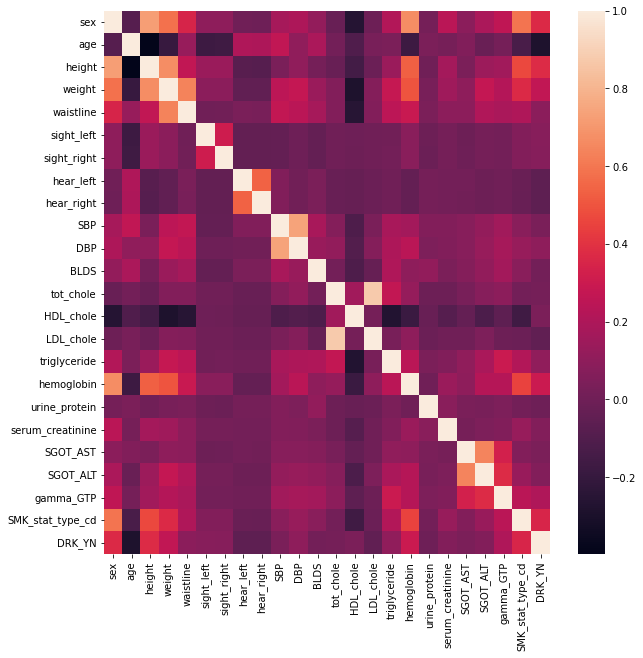

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

##### Feature selection for drinking

In [21]:
# we are selecting features for drinking using Recursive Feature Elemination method 
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

rfe_drk = RFE(LogisticRegression() )
rfe_drk = rfe_drk.fit(df.drop(['DRK_YN','SMK_stat_type_cd'],axis=1), df['DRK_YN'])

In [22]:
print(rfe_drk.support_)
print(rfe_drk.ranking_)
drk_features = rfe_drk.support_

[ True  True False False False False  True  True  True False  True False
 False  True False False False  True  True False  True  True]
[ 1  1  5  4  6 12  1  1  1  8  1 11  9  1  7 10  3  1  1  2  1  1]


##### Feature selection for smoking

In [23]:
#similarly for smoking
rfe_smk = RFE(LogisticRegression())
rfe_smk = rfe_smk.fit(df.drop(['DRK_YN','SMK_stat_type_cd'],axis=1), df['SMK_stat_type_cd'])

smk_features = rfe_smk.support_
print(rfe_smk.support_)
print(rfe_smk.ranking_)

[ True  True  True  True  True False False  True  True  True False False
 False  True False False  True False  True False False False]
[ 1  1  1  1  1  9  5  1  1  1  7 11  3  1  2 12  1  4  1  8 10  6]


In [24]:
smk_feature_set = set(df.columns[list(smk_features)+[False, False]]) #appending with falses to remove the labels from columns
drk_feature_set = set(df.columns[list(drk_features)+[False, False]])

In [25]:
print("Features for Drinking:")
print(drk_feature_set)
print("Features for Smoking:")
print(smk_feature_set)

Features for Drinking:
{'hear_left', 'urine_protein', 'sight_right', 'age', 'hear_right', 'SGOT_ALT', 'gamma_GTP', 'DBP', 'sex', 'HDL_chole', 'serum_creatinine'}
Features for Smoking:
{'hear_left', 'SBP', 'hemoglobin', 'age', 'hear_right', 'sex', 'height', 'HDL_chole', 'waistline', 'serum_creatinine', 'weight'}


In [26]:
#Common features
total_features = set.union(smk_feature_set,drk_feature_set)
total_features

{'DBP',
 'HDL_chole',
 'SBP',
 'SGOT_ALT',
 'age',
 'gamma_GTP',
 'hear_left',
 'hear_right',
 'height',
 'hemoglobin',
 'serum_creatinine',
 'sex',
 'sight_right',
 'urine_protein',
 'waistline',
 'weight'}

These are the selected 16 features out of all the available data that can be used for predicting smoking and drinking